<center><h1>Plot Testing Metrics</h1></center>

Plots testing metrics such as XTE, Steering Variance, etc...

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def load_csv(path_to_file):
    return pd.read_csv(path_to_file, sep=";").dropna(axis='columns')

def plot_csv(data, data_labels, colors, title):
    x = np.arange(len(data)) + 1
    
    for data_label, color in zip(data_labels, colors):
        plt.plot(x, data[data_label], color+'-', label=data_label)
    plt.legend(loc="upper left")
    plt.ylim(0, 20)
    plt.title(title)
    plt.show()

def plot_stats_laps(path_to_file, title):
    plot_csv(path_to_file, ['XTE avg', 'Steer avg', 'Speed avg'], ['r', 'g', 'b'], title)
    
def plot_stats_frames(path_to_file, title):
    plot_csv(path_to_file, ['XTE', 'Steering', 'Throttle'], ['r', 'g', 'b'], title)
    
def plot_multiple_through_time(datas, metric, labels, title=None):
    for data, label in zip(datas, labels):
        y = data[metric]
        x = np.arange(len(data))
        plt.plot(x, y, label=label)
    if title:
        plt.title(title)
    plt.legend(loc="upper left")
    plt.show()

In [7]:
base = '/Users/brianpulfer/Desktop/USI/MAI-Thesis/Thesis/tests/sim/1 - cropping/'

human_path = '/Users/brianpulfer/Desktop/USI/MAI-Thesis/Thesis/tests/sim/320x240 dataset/Frames - 2021-2-26-10h_22m.csv'
crop80_path = base + 'crop80/Frames - 2021-2-26-14h_35m.csv'
crop100_path = base + 'crop100/Frames - 2021-2-26-14h_48m.csv'
crop120_path = base + 'crop120/Frames - 2021-2-26-14h_54m.csv'

paths = [human_path, crop80_path, crop100_path, crop120_path]
datas = [load_csv(path) for path in paths]
for i in range(len(datas)):
    datas[i] =  datas[i][datas[i]['Lap'] < 11]

In [8]:
def print_stats(data):
    xte_avg = round(np.mean(abs(data['XTE'])), 3)
    xte_max = round(np.max(abs(data['XTE'])), 3)
    steer_avg = round(np.mean(abs(data['Steering'])), 3)
    steer_std = round(np.std(abs(data['Steering'])), 3)
    vel_avg = round(np.mean(abs(data['Velocity'])), 3)
    vel_std = round(np.std(abs(data['Velocity'])), 3)
    print(xte_avg, "&",  xte_max, "&", steer_avg, "&", steer_std, "&", vel_avg, "&", vel_std)

for data in datas:
    print_stats(data)

0.569 & 3.437 & 9.744 & 7.316 & 4.764 & 0.686
0.459 & 3.894 & 9.025 & 5.792 & 4.901 & 0.756
0.498 & 3.636 & 8.915 & 5.771 & 5.134 & 0.747
3.013 & 12.416 & 7.986 & 5.053 & 3.917 & 2.059


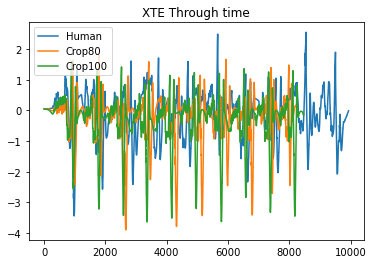

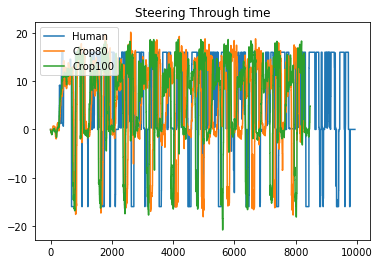

In [16]:
plot_multiple_through_time(datas[:-1], 'XTE', ['Human', 'Crop80', 'Crop100'], "XTE Through time")